UN Data on GDP and Internet Users  
=============================
    


First, as always, import necessary packages/modules/shortcuts/magics using _customary_ aliases.

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
%matplotlib inline

Read the GDP dataset into your notebook as a DataFrame called **gdp_df**. Display the first 6 rows.

In [130]:
gdp_df = pd.read_csv("data/gdp_percapita.csv",skipfooter=3, engine='python')
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2017,1758.465636,NaN
1,Afghanistan,2016,1757.023490,NaN
2,Afghanistan,2015,1766.593077,NaN
3,Afghanistan,2014,1795.735834,NaN
4,Afghanistan,2013,1807.762344,NaN
5,Afghanistan,2012,1772.764974,NaN


Read the Internet Use dataset into your notebook as a DataFrame called **internet_df** and display the first 6 rows.

In [131]:
internet_df = pd.read_csv("data/internet_use.csv",nrows=4495)
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


Display the shape, data types, and last 5 rows of **gdp_df** and **internet_df**.

In [132]:
gdp_df.shape

(6500, 4)

In [133]:
internet_df.shape

(4495, 4)

In [134]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [135]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [136]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6495,Zimbabwe,1994,2768.309953,NaN
6496,Zimbabwe,1993,2572.870395,NaN
6497,Zimbabwe,1992,2591.007534,NaN
6498,Zimbabwe,1991,2906.272849,NaN
6499,Zimbabwe,1990,2819.549467,NaN


In [137]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


The column "Values Footnotes" doesn't contain data for the majority of the rows, and near the tail contains footnotes that are unecessary. Let's drop them from both dataframes (head is displayed to make certain the column has been removed).

In [138]:
gdp_df = gdp_df.drop(columns = ["Value Footnotes"])
gdp_df.head()


,Country or Area,Year,Value
0,Afghanistan,2017,1758.465636
1,Afghanistan,2016,1757.023490
2,Afghanistan,2015,1766.593077
3,Afghanistan,2014,1795.735834
4,Afghanistan,2013,1807.762344


In [139]:
internet_df = internet_df.drop(columns=["Value Footnotes"])
internet_df.head()


,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


Let's rename some columns for concision, and precision. We will soon be merging our DataFrames and we want to know, for example, what "Values" refers to without having to go back and look at each DF individually.

In [140]:
gdp_df = gdp_df.rename(columns={"Country or Area":"Country", "Value":"GDP_Per_Capita"})
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2017,1758.465636
1,Afghanistan,2016,1757.023490
2,Afghanistan,2015,1766.593077
3,Afghanistan,2014,1795.735834
4,Afghanistan,2013,1807.762344


In [141]:
internet_df = internet_df.rename(columns = {"Country or Area":"Country", "Value":"Internet_Users_Pct"})
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


Time to merge!
==============
We are using an inner merge in this case. Head and tail are displayed to make sure our merge happened the way we wanted. It looks clean.

In [142]:
gdp_and_internet_use_df = pd.merge(gdp_df, internet_df, on = ['Country','Year'], how = 'inner')
gdp_and_internet_use_df.head()


,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,6.390000
1,Afghanistan,2013,1807.762344,5.900000
2,Afghanistan,2012,1772.764974,5.454545
3,Afghanistan,2011,1626.764793,5.000000
4,Afghanistan,2010,1671.581238,4.000000


In [143]:
gdp_and_internet_use_df.tail()


,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3514,Zimbabwe,1997,3036.422224,0.033080
3515,Zimbabwe,1996,2985.856605,0.016790
3516,Zimbabwe,1995,2736.486436,0.007684
3517,Zimbabwe,1994,2768.309953,0.001739
3518,Zimbabwe,1990,2819.549467,0.000000


 Now we subset gdp_and_intenet_use_df to keep only 2004, 2009, and 2014. I'll Check that we got the right rows by displaying the head.

In [144]:
Yearsub_df = gdp_and_internet_use_df[gdp_and_internet_use_df.Year.astype(int).isin([2004, 2009, 2014])]
Yearsub_df.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,6.390000
5,Afghanistan,2009,1502.354073,3.550000
10,Afghanistan,2004,1025.208245,0.105809
13,Albania,2014,10700.522802,60.100000
18,Albania,2009,9525.372374,41.200000


Looking at each year individually, we see:

In [145]:
gdpinternet2004_df = gdp_and_internet_use_df[gdp_and_internet_use_df.Year.astype(int).isin([2004])]
gdpinternet2004_df.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
10,Afghanistan,2004,1025.208245,0.105809
23,Albania,2004,7001.054941,2.420388
44,Algeria,2004,11847.319747,4.634475
66,Angola,2004,4604.657044,0.464815
86,Antigua and Barbuda,2004,21183.426857,24.266544


In [146]:
gdpinternet2009_df = gdp_and_internet_use_df[gdp_and_internet_use_df.Year.astype(int).isin([2009])]
gdpinternet2009_df.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2009,1502.354073,3.55
18,Albania,2009,9525.372374,41.20
39,Algeria,2009,12694.745562,11.23
61,Angola,2009,6292.534856,6.00
81,Antigua and Barbuda,2009,22592.413330,42.00


In [147]:
gdpinternet2014_df = gdp_and_internet_use_df[gdp_and_internet_use_df.Year.astype(int).isin([2014])]
gdpinternet2014_df.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,6.39
13,Albania,2014,10700.522802,60.10
34,Algeria,2014,13549.025150,18.09
56,Angola,2014,6813.052106,21.26
76,Antigua and Barbuda,2014,20820.551057,64.00


Hmmm, which Country (in 2014) had the highest percentage of internet users?
Iceland, with 98.16%

In [148]:
gdpinternet2014_df.Internet_Users_Pct.nlargest()
gdpinternet2014_df[gdpinternet2014_df.Internet_Users_Pct.astype(int).isin([98.16])]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1395,Iceland,2014,42774.888851,98.16


I wonder if it was Iceland for all the years we looked at?
Sweden *narrowly* beat them in 2004, But Iceland had secured their #1 space by 2009.

In [149]:
gdpinternet2004_df.Internet_Users_Pct.max()
gdpinternet2004_df[gdpinternet2004_df.Internet_Users_Pct.astype(int).isin([83.89])]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1405,Iceland,2004,38893.378800,83.88
3002,Sweden,2004,40299.920252,83.89


In [150]:
gdpinternet2009_df.Internet_Users_Pct.max()
gdpinternet2009_df[gdpinternet2009_df.Internet_Users_Pct.astype(int).isin([93.0])]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1400,Iceland,2009,41505.084835,93.0


What about the lowest percentage of internet users? That would be Timor-Leste (2014), Timor-Leste (2009), and Myanmar (2004).

In [151]:
gdpinternet2014_df.Internet_Users_Pct.min()
gdpinternet2014_df[gdpinternet2014_df.Internet_Users_Pct.astype(int).isin([1.14])]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
539,Burundi,2014,768.469837,1.38
1275,Guinea,2014,1836.561073,1.72
2270,Niger,2014,900.136918,1.95
3104,Timor-Leste,2014,6466.737708,1.14


In [152]:
gdpinternet2009_df.Internet_Users_Pct.min()
gdpinternet2009_df[gdpinternet2009_df.Internet_Users_Pct.astype(int).isin([0.18])]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
544,Burundi,2009,721.063140,0.900000
569,Cambodia,2009,2417.293669,0.530000
988,Eritrea,2009,1950.533339,0.540000
1028,Ethiopia,2009,981.718208,0.540000
1280,Guinea,2009,1626.174435,0.940000
2141,Myanmar,2009,3387.818242,0.220000
2275,Niger,2009,778.982257,0.760000
2747,Sierra Leone,2009,1172.862734,0.260000
3109,Timor-Leste,2009,9275.529304,0.185252


In [153]:
gdpinternet2004_df.Internet_Users_Pct.min()
gdpinternet2004_df[gdpinternet2004_df.Internet_Users_Pct.astype(int).isin([0.024])]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
10,Afghanistan,2004,1025.208245,0.105809
66,Angola,2004,4604.657044,0.464815
259,Bangladesh,2004,1896.763311,0.199036
529,Burkina Faso,2004,1200.417062,0.400295
549,Burundi,2004,708.833720,0.349060
574,Cambodia,2004,1765.999799,0.300437
592,Cameroon,2004,2799.099397,0.976075
646,Chad,2004,1580.648456,0.360920
977,Equatorial Guinea,2004,28384.466729,0.843930
1033,Ethiopia,2004,676.917430,0.155335


Now let's see who is making the most money. In 2014, it was Qatar.
Bringing up the rear of the pack is Mauritania, with the smallest GDP.

In [154]:
gdpinternet2014_df.GDP_Per_Capita.max()
gdpinternet2014_df[gdpinternet2014_df.GDP_Per_Capita.astype(int).isin([116693.50770116401])]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2556,Qatar,2014,116693.507701,91.49


In [155]:
gdpinternet2014_df.GDP_Per_Capita.min()
gdpinternet2014_df[gdpinternet2014_df.GDP_Per_Capita.astype(int).isin([377.908916197116])]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1983,Mauritania,2014,377.908916,10.7


And now for some helpful visualization!
===============
Below, view scatterplots showing the percentage of internet users vs. GDP for the years 2004, 2009, and 2014.

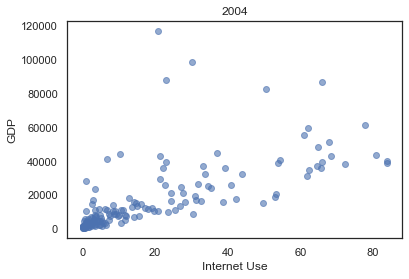

In [156]:
plt.scatter(x='Internet_Users_Pct',y='GDP_Per_Capita',data=gdpinternet2004_df, alpha = 0.6)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel("Internet Use")
plt.ylabel("GDP")
plt.title('2004')
sns.set(style="whitegrid");

In [1]:
plt.scatter(x='Internet_Users_Pct',y='GDP_Per_Capita',data=gdpinternet2009_df, alpha = 0.6)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel("Internet Use")
plt.ylabel("GDP")
plt.title('2009')
sns.set(style="white");

NameError: name 'plt' is not defined

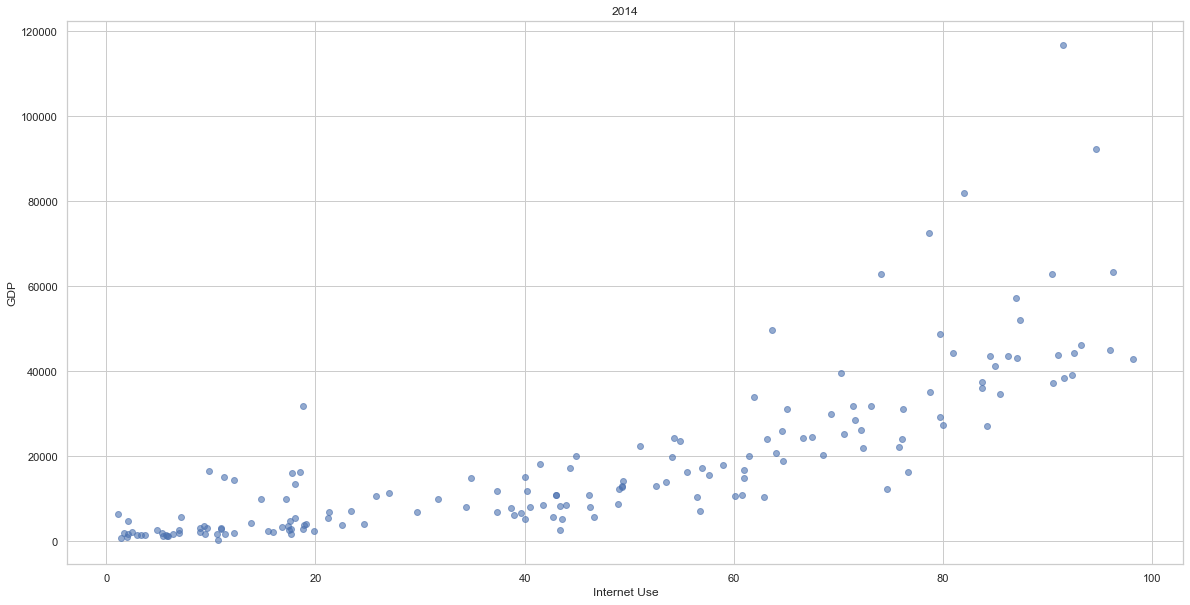

In [158]:
plt.scatter(x='Internet_Users_Pct',y='GDP_Per_Capita',data=gdpinternet2014_df, alpha = 0.6)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel("Internet Use")
plt.ylabel("GDP")
plt.title('2014')
sns.set(style="whitegrid");

I observe that the plost start out pretty scattered and become more predictable over time. Internet use becomes more distributed (rather than most countries having a low use percentage), and GDP starts tracking higher internet use as the years progress. 

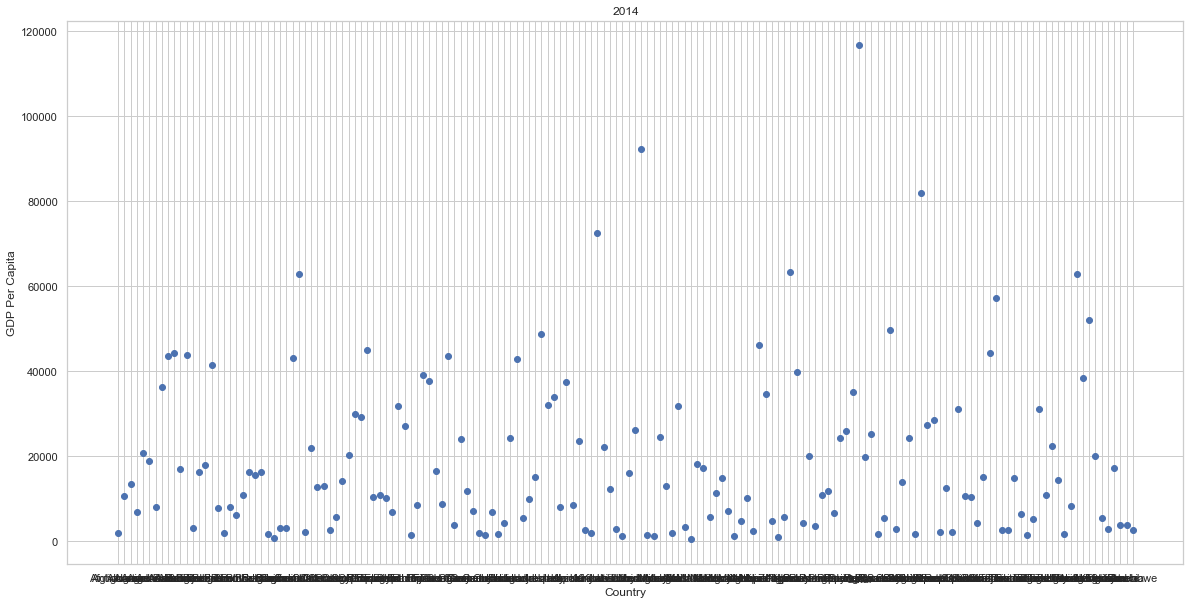

In [159]:
plt.scatter(x="Country",y="GDP_Per_Capita",data=gdpinternet2014_df);
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel("Country")
plt.ylabel("GDP Per Capita")
plt.title("2014");

The GDP data (above) appears to be unimodal. There is a clear peak.

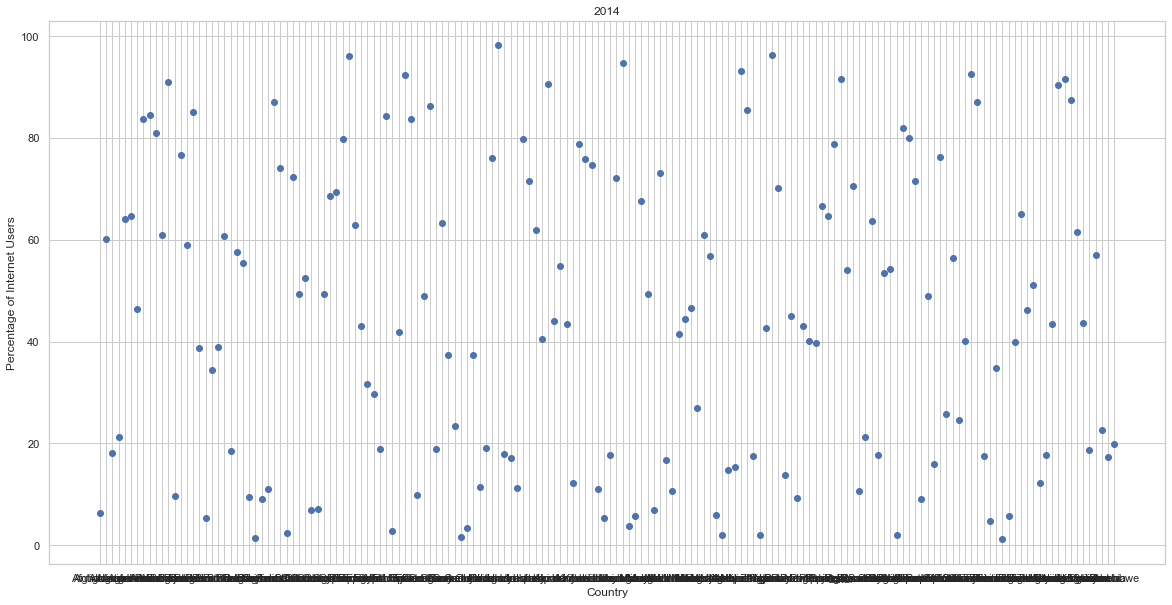

In [160]:
plt.scatter(x="Country",y="Internet_Users_Pct",data=gdpinternet2014_df)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel("Country")
plt.ylabel("Percentage of Internet Users")
plt.title(2014);

The Internet users data (above) looks more random. There is no obvious peak of values.  

Now let's take a closer look into the top countries in terms of internet use. A quick glance shows us the top 5 are:

In [161]:
gdpinternet2014_df.nlargest(5, 'Internet_Users_Pct')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1395,Iceland,2014,42774.888851,98.16
2310,Norway,2014,63419.314779,96.30
854,Denmark,2014,45057.074170,95.99
1812,Luxembourg,2014,92349.186486,94.67
2199,Netherlands,2014,46238.209702,93.17


Cool! Let's see how all these countries did during 2004 and 2009 as well. I'm going to create a DF showing the 5 countries over 3 years.

In [162]:
country_list=list(gdpinternet2014_df.nlargest(5, 'Internet_Users_Pct').Country)
top_5_internet_df = Yearsub_df.loc[Yearsub_df.Country.isin(country_list)]


Just to make certain I have everything I need and nothing extra or missing, let's get that shape. 3*5 is 15, so I should have 15 rows. 


In [163]:
top_5_internet_df.shape


(15, 4)

We already made some scatter plots of all of the internet user data, but a breakdown of just these 5 countries and years might be helpful. I'll create a facet grid to visualize it.

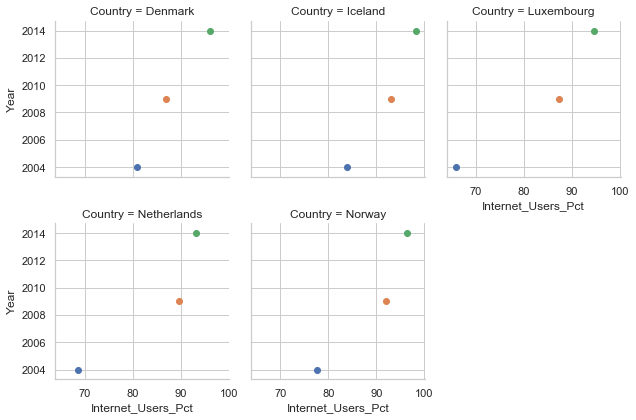

In [164]:
g = sns.FacetGrid(top_5_internet_df, col = "Country", hue = "Year", col_wrap=3)
g.map(plt.scatter, "Internet_Users_Pct", "Year");



Looks like Luxembourg really grew a lot between 2004 and 2014.

Now let's glance at the other end of the spectrum and find the 5 countries with the smallest percentage of internet users.

In [165]:
country_list2=list(gdpinternet2014_df.nsmallest(5, 'Internet_Users_Pct').Country)
bottom_5_internet_df = Yearsub_df.loc[Yearsub_df.Country.isin(country_list2)]

In [166]:
bottom_5_internet_df.shape

(14, 4)

The shape is unexpected, I should again have <b>15</b> rows. I am not certain why this was not pulled correctly. Looking at the text editor, I see there doesn't appear to be an entry for Timor-Leste in 2004. I am not certain the reason for this, since Timor-Leste had both joined the UN and had internet service in 2002, 2 years prior.

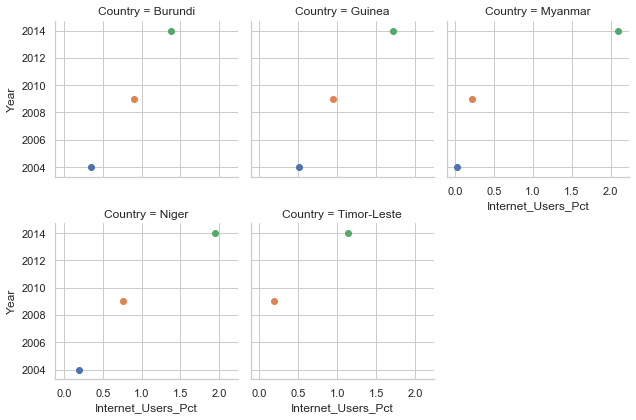

In [167]:
g = sns.FacetGrid(bottom_5_internet_df, col = "Country", hue = "Year", col_wrap=3)
g.map(plt.scatter, "Internet_Users_Pct", "Year");

While Myanmar and Niger have increased their internet users significantly, Burundi has noticibly lagged, consistantly having a low percentage of users *relative even to the other low percentage countries.* Timor-Leste is pretty low too, but with only 2 values it is hard to say what will come next for them.

GDP next. First, we get the countries with the highest GDP in 2014.

In [168]:
country_list3=list(gdpinternet2014_df.nlargest(5, 'GDP_Per_Capita').Country)
top_5_GDP_df = gdp_df.loc[gdp_df.Country.isin(country_list3)]

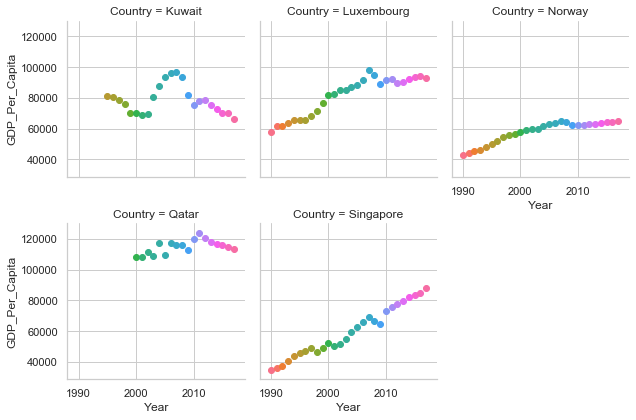

In [169]:
g = sns.FacetGrid(top_5_GDP_df, col = "Country",hue = "Year", col_wrap=3)
g.map(plt.scatter, "Year","GDP_Per_Capita");


Kuwait and Qatar have peaky, irregular growth most likely because their wealth is based on the sale of oil. The GDP is high due to high profits and low populations, but can also swing dramatically with even small chages because of the distribution over such a small population. The rises and falls of GDP correspond to market price changes for oil in the global economy, as well as discoveries of additional resourses. For example, Kuwait discovered natural gas reserves in 2006, allowing for more export (and therefore higher GPD through sales) of their petroleum in the years following (referrence: https://www.kockw.com/sites/EN/Pages/Profile/History/KOC-History.aspx).

In [170]:
country_list4=list(gdpinternet2014_df.nsmallest(5, 'GDP_Per_Capita').Country)
bottom_5_GDP_df = gdp_df.loc[gdp_df.Country.isin(country_list4)]


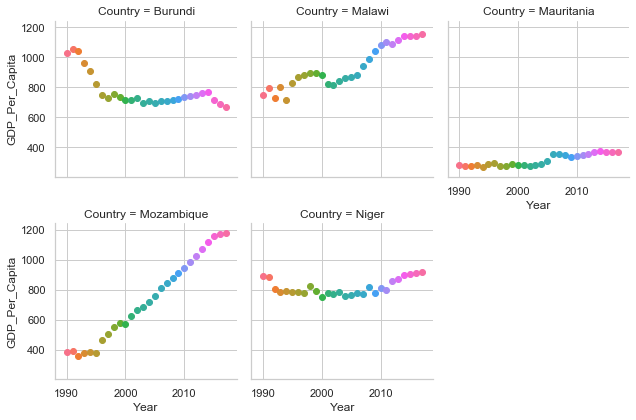

In [171]:
g = sns.FacetGrid(bottom_5_GDP_df, col = "Country",hue = "Year",col_wrap=3)
g.map(plt.scatter, "Year","GDP_Per_Capita");

Mauritania officially disavows and legally prosecutes slavery, but it is estimated that over the course of this time frame, between 10 and 20% of the population lived in slavery, which probably accounts for their abysmal GDP (referrence: https://en.wikipedia.org/wiki/Mauritania). Burundi is unstable and has been plagued by genocides, killings (notabley in 1994 both the president and his vice were killed when their plane was shot down.) 2015, where you see the next dip, saw a failed coup d'etat that lead to unrest and more killing (referrence: https://en.wikipedia.org/wiki/Burundi). Mozambique started doing remarkably well in terms of growth rate after 1994, not surprising, since they acheived democracy in 1994 following a lengthy (several decades) civil war(referrence: https://www.bbc.com/news/world-africa-13890416). 

Bonus Question
=========
Now I'm going to pull in another UN dataset. I'm going to look at methane gas.

In [241]:
methane_df = pd.read_csv("data/Methane.csv")
methane_df.head()

,Country or Area,Year,Value
0,Australia,2016,102804.927109
1,Australia,2015,102326.085616
2,Australia,2014,101649.015997
3,Australia,2013,103672.344678
4,Australia,2012,104594.303230


In [242]:
methane_df.tail()

,Country or Area,Year,Value
1156,United States of America,1994,774603.672507
1157,United States of America,1993,769973.082107
1158,United States of America,1992,783595.662565
1159,United States of America,1991,784557.250686
1160,United States of America,1990,779942.238765


Next, I will rename my columns to match the naming convention in my other dataframe.

In [246]:
methane_df = methane_df.rename(columns={"Country or Area":"Country", "Methane Emissions":"Methane_Emissions"})
methane_df.head()

,Country,Year,Methane_Emissions
0,Australia,2016,102804.927109
1,Australia,2015,102326.085616
2,Australia,2014,101649.015997
3,Australia,2013,103672.344678
4,Australia,2012,104594.303230


Now time to merge! Let's see if we can get a nice merge here, and play around. I wonder if we have any crossover from before.

In [247]:
gdpinternet_and_methane_df = pd.merge(gdp_and_internet_use_df, methane_df, on = ['Country','Year'], how = 'inner')
gdpinternet_and_methane_df.head()


,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Methane_Emissions
0,Australia,2014,43672.130373,84.560000,101649.015997
1,Australia,2013,43218.260988,83.000000,103672.344678
2,Australia,2012,42847.772193,79.000000,104594.303230
3,Australia,2011,41965.358419,79.487698,105092.283616
4,Australia,2010,41529.784437,76.000000,103085.796606


In [248]:
methane2004_df = gdpinternet_and_methane_df[gdpinternet_and_methane_df.Year.astype(int).isin([2004])]
methane2004_df.nlargest(5,"Methane_Emissions")

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Methane_Emissions
124,Canada,2004,39671.625722,65.955963,108597.099328
838,Ukraine,2004,7015.822833,3.489478,108278.576737
861,United Kingdom,2004,36285.597579,65.610000,92730.863480
313,Germany,2004,37418.092500,64.730000,71620.855452
288,France,2004,36050.601091,39.150000,65498.417578


In [249]:
methane2009_df = gdpinternet_and_methane_df[gdpinternet_and_methane_df.Year.astype(int).isin([2009])]
methane2009_df.nlargest(5,"Methane_Emissions")

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Methane_Emissions
5,Australia,2009,41326.394712,74.25,105096.379539
119,Canada,2009,39923.885284,80.30,96670.999225
833,Ukraine,2009,7505.677757,17.90,87412.502714
856,United Kingdom,2009,36177.029334,83.56,69531.925786
283,France,2009,36289.803026,71.58,62225.515480


In [251]:
methane2014_df = gdpinternet_and_methane_df[gdpinternet_and_methane_df.Year.astype(int).isin([2014])]
methane2014_df.nlargest(5,"Methane_Emissions")

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Methane_Emissions
0,Australia,2014,43672.130373,84.56,101649.015997
114,Canada,2014,43137.713761,87.12,101002.838385
828,Ukraine,2014,8243.473515,43.40,70941.472708
278,France,2014,37575.811818,83.75,58718.671936
805,Turkey,2014,22343.497453,51.04,58130.475158


In [298]:
countrylist5=list(methane2014_df.nlargest(5, "Methane_Emissions").Country)
megamethane_df = gdpinternet_and_methane_df.loc[gdpinternet_and_methane_df.Country.isin(countrylist5)]                 
megamethane_df.idxmin()

TypeError: reduction operation 'argmin' not allowed for this dtype

Apparently not....

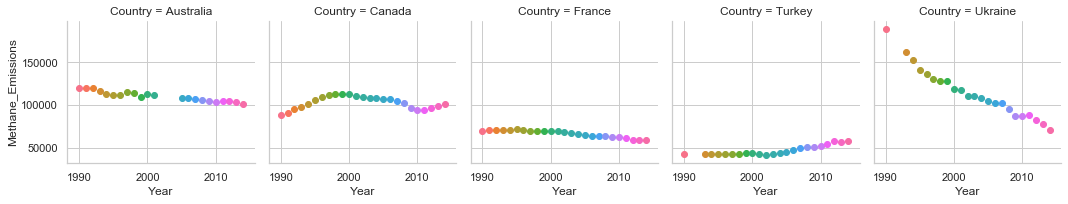

In [254]:
g = sns.FacetGrid(megamethane_df, col = "Country",hue = "Year")
g.map(plt.scatter, "Year","Methane_Emissions");

So it looks like ukraine has really been cleaning up their act. 

In [295]:
bins = np.arange(1990-2000,2001-2010,2011-2014)
g = sns.FacetGrid(methane2014_df, col="Country", row="Methane_Emissions")
g = g.map(plt.hist, "Methane_Emissions", bins=bins)
plt.show


ValueError: negative dimensions are not allowed

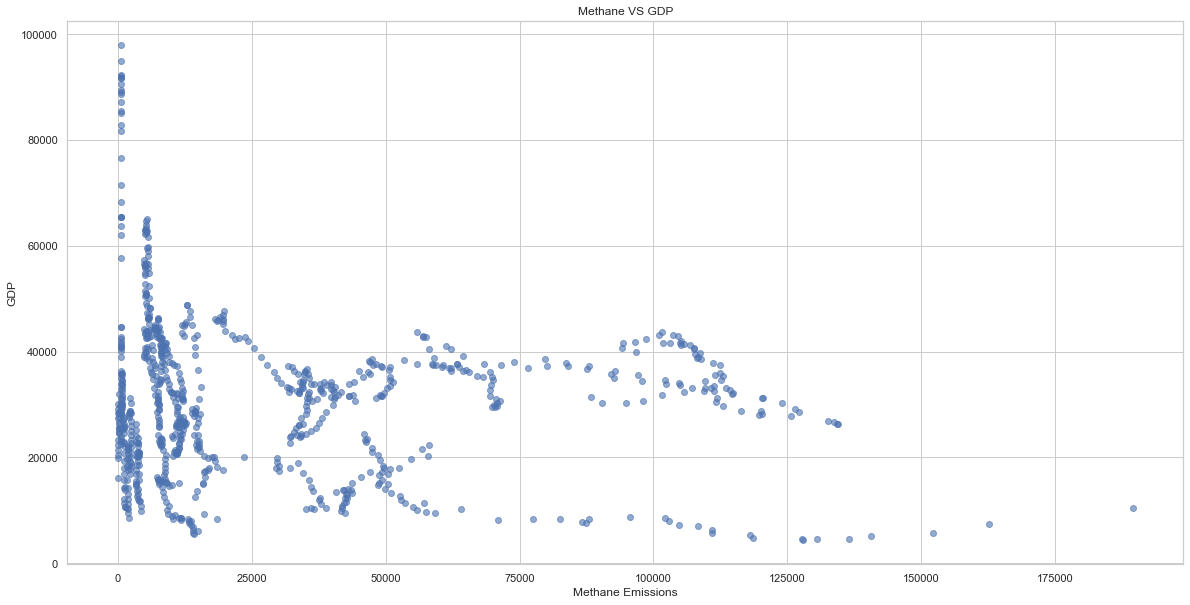

In [255]:
plt.scatter(x='Methane_Emissions',y='GDP_Per_Capita',data=gdpinternet_and_methane_df, alpha = 0.6)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel("Methane Emissions")
plt.ylabel("GDP")
plt.title('Methane VS GDP')
sns.set(style="whitegrid")

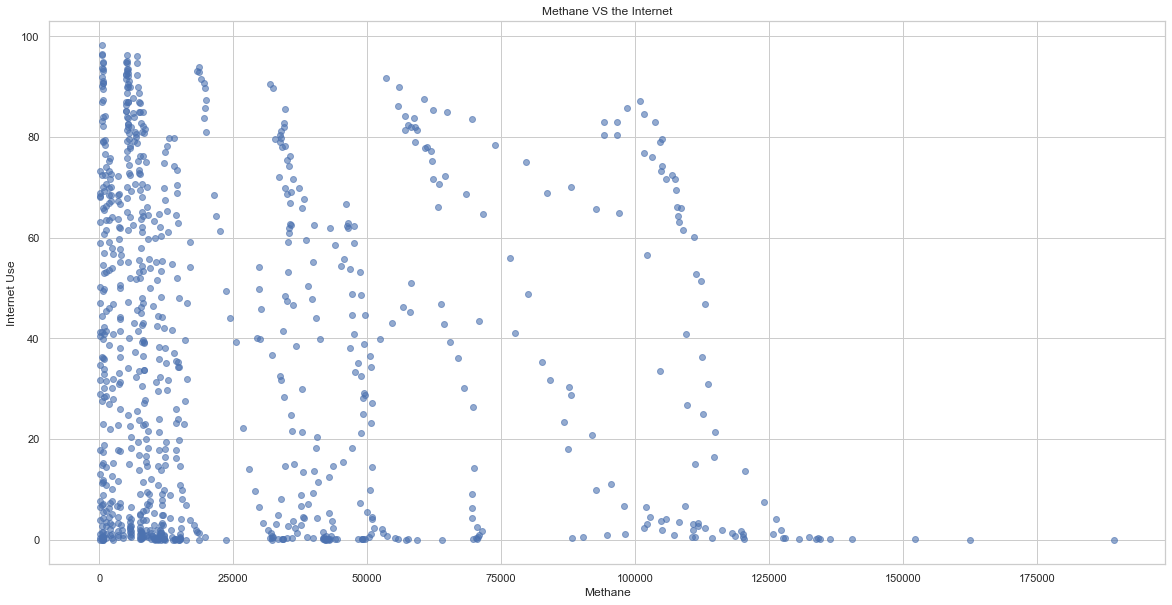

In [256]:
plt.scatter(x='Methane_Emissions',y='Internet_Users_Pct',data=gdpinternet_and_methane_df, alpha = 0.6)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel("Methane")
plt.ylabel("Internet Use")
plt.title('Methane VS the Internet')
sns.set(style="whitegrid")

I'll look at some more data. Here is the info on child death rates. This dataframe is a lot shorter since it only shows data form 3 years: 1970, 1090, and 2011.

In [264]:
deathrate_df = pd.read_csv("data/ChildDeathRate.csv",skipfooter=3,engine='python')
deathrate_df.head()

,Country or Area,Subgroup,Year,Source,Unit,Value,Value Footnotes
0,Afghanistan,Total,2011,UN_United Nations Population Division,Per 1000 population,16,NaN
1,Afghanistan,Total,1990,UN_United Nations Population Division,Per 1000 population,22,NaN
2,Afghanistan,Total,1970,UN_United Nations Population Division,Per 1000 population,29,NaN
3,Albania,Total,2011,UN_United Nations Population Division,Per 1000 population,6,NaN
4,Albania,Total,1990,UN_United Nations Population Division,Per 1000 population,6,NaN


In [265]:
deathrate_df.tail()

,Country or Area,Subgroup,Year,Source,Unit,Value,Value Footnotes
565,Zambia,Total,1990,UN_United Nations Population Division,Per 1000 population,17,NaN
566,Zambia,Total,1970,UN_United Nations Population Division,Per 1000 population,17,NaN
567,Zimbabwe,Total,2011,UN_United Nations Population Division,Per 1000 population,13,NaN
568,Zimbabwe,Total,1990,UN_United Nations Population Division,Per 1000 population,9,NaN
569,Zimbabwe,Total,1970,UN_United Nations Population Division,Per 1000 population,13,NaN


I'm going to drop a couple columns that I'm not terribly interested in

In [274]:
deathrate_df.head()


,Country or Area,Year,Value
0,Afghanistan,2011,16
1,Afghanistan,1990,22
2,Afghanistan,1970,29
3,Albania,2011,6
4,Albania,1990,6


Now let's rename again to get everything to match up nicely for our merge.

In [277]:
deathrate_df = deathrate_df.rename(columns={"Country or Area":"Country", "Value":"Deathrate_Per_1000"})
deathrate_df.head()

,Country,Year,Deathrate_Per_1000
0,Afghanistan,2011,16
1,Afghanistan,1990,22
2,Afghanistan,1970,29
3,Albania,2011,6
4,Albania,1990,6


In [278]:
gdpinternet_and_deathrate_df = pd.merge(gdp_and_internet_use_df, deathrate_df, on = ['Country','Year'], how = 'inner')
gdpinternet_and_deathrate_df.head()


,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Deathrate_Per_1000
0,Afghanistan,2011,1626.764793,5.0,16
1,Albania,2011,10207.753519,49.0,6
2,Albania,1990,4458.247662,0.0,6
3,Algeria,2011,13046.369962,14.0,5
4,Algeria,1990,10297.842349,0.0,6


Now I will find the data for only the years where there is actual crossover: 1990 and 2011

In [280]:
gdpinterdeath_df = gdpinternet_and_deathrate_df[gdpinternet_and_deathrate_df.Year.astype(int).isin([1990,2011])]
gdpinterdeath_df.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Deathrate_Per_1000
0,Afghanistan,2011,1626.764793,5.0,16
1,Albania,2011,10207.753519,49.0,6
2,Albania,1990,4458.247662,0.0,6
3,Algeria,2011,13046.369962,14.0,5
4,Algeria,1990,10297.842349,0.0,6


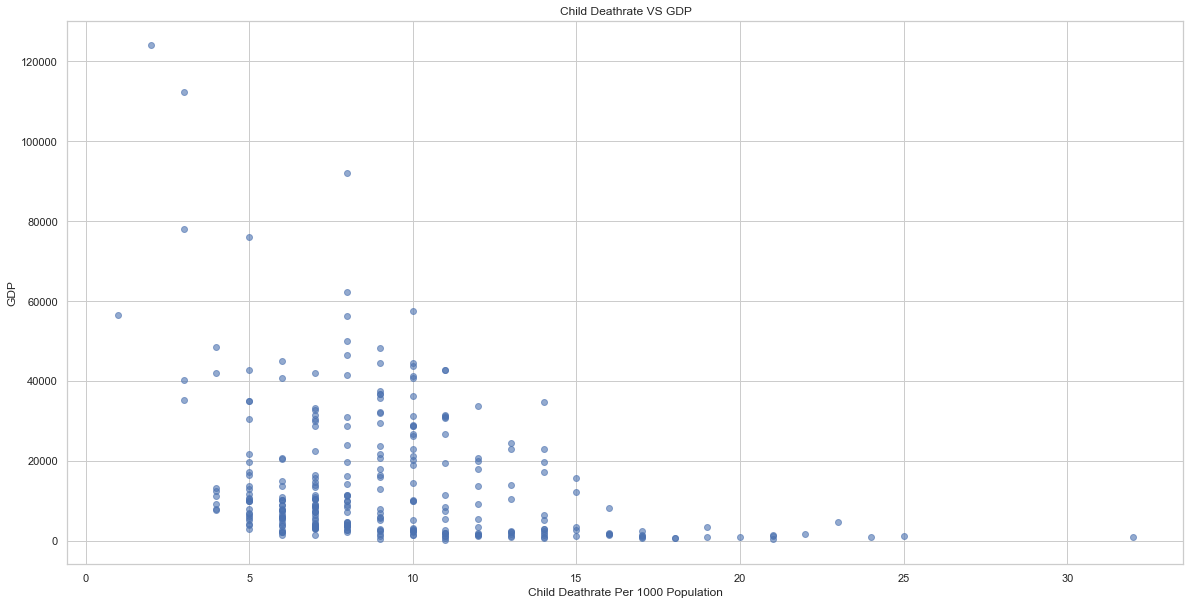

In [281]:
plt.scatter(x='Deathrate_Per_1000',y='GDP_Per_Capita',data=gdpinterdeath_df, alpha = 0.6)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel("Child Deathrate Per 1000 Population")
plt.ylabel("GDP")
plt.title('Child Deathrate VS GDP')
sns.set(style="whitegrid")

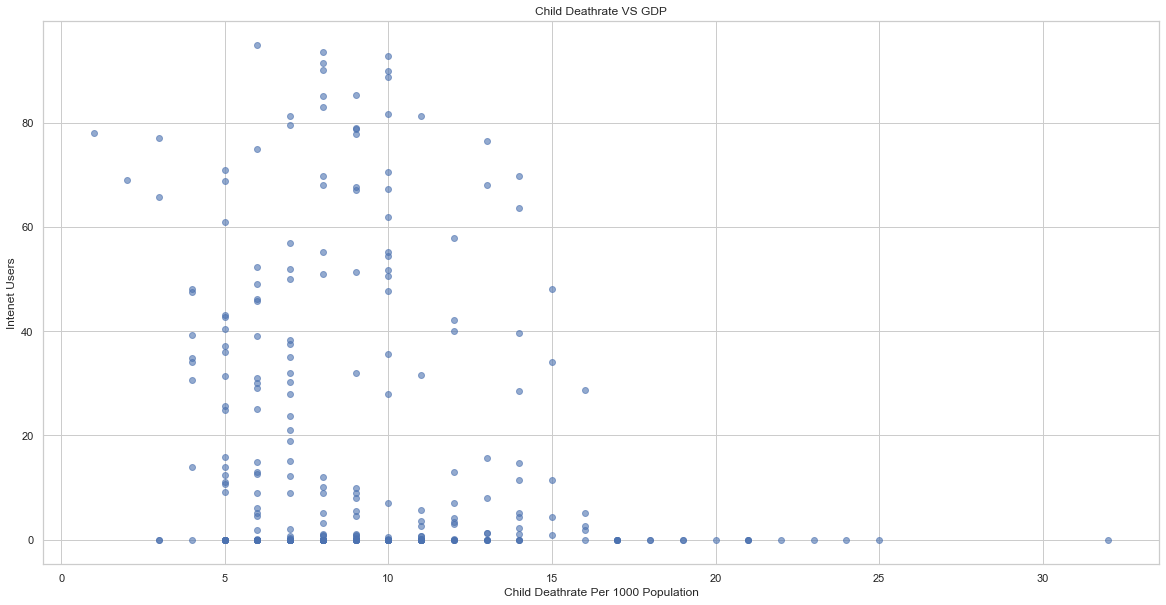

In [283]:
plt.scatter(x='Deathrate_Per_1000',y='Internet_Users_Pct',data=gdpinterdeath_df, alpha = 0.6)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel("Child Deathrate Per 1000 Population")
plt.ylabel("Intenet Users")
plt.title('Child Deathrate VS GDP')
sns.set(style="whitegrid")